<a href="https://colab.research.google.com/github/laroccathebrux/-DS-FinancePortfolioOptimization/blob/main/Finance_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'SAP', 'TSLA', 'IBM', 'DELL', 'MSFT', 'ORCL']

In [3]:
weights = np.array(['0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1', '0.1'], dtype='float')
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [4]:
stockStartDate = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')
stockDays = 253
today

'2021-02-02'

In [5]:
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [6]:
df

,FB,AMZN,AAPL,NFLX,SAP,TSLA,IBM,DELL,MSFT,ORCL
Date,,,,,,,,,,
2013-01-02,28.000000,257.309998,17.065252,13.144286,72.977722,7.072000,146.482193,NaN,23.180780,30.801588
2013-01-03,27.770000,258.480011,16.849854,13.798571,71.250694,6.954000,145.676483,NaN,22.870243,30.464188
2013-01-04,28.760000,259.149994,16.380499,13.711429,71.224129,6.880000,144.721558,NaN,22.442219,30.730547
2013-01-07,29.420000,268.459991,16.284145,14.171429,70.666168,6.868000,144.087433,NaN,22.400255,30.570730
2013-01-08,29.059999,266.380005,16.327972,13.880000,70.754738,6.736000,143.886032,NaN,22.282753,30.579615
...,...,...,...,...,...,...,...,...,...,...
2021-01-26,282.049988,3326.129883,143.160004,561.929993,134.880005,883.090027,122.489998,76.040001,232.330002,61.799999
2021-01-27,272.140015,3232.580078,142.059998,523.280029,132.190002,864.159973,122.470001,73.860001,232.899994,62.549999
2021-01-28,265.000000,3237.620117,137.089996,538.599976,130.440002,835.429993,120.080002,73.919998,238.929993,61.220001


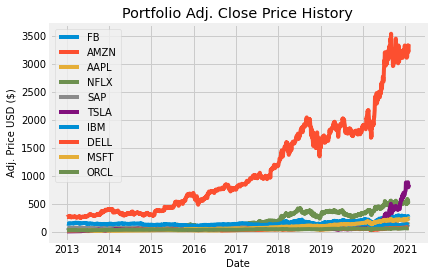

In [7]:
title = 'Portfolio Adj. Close Price History'

for c in df.columns.values:
  plt.plot(df[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Adj. Price USD ($)', fontsize=10)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [8]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,SAP,TSLA,IBM,DELL,MSFT,ORCL
Date,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,-0.023665,-0.016686,-0.005500,NaN,-0.013396,-0.010954
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,-0.000373,-0.010641,-0.006555,NaN,-0.018715,0.008743
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.007834,-0.001744,-0.004382,NaN,-0.001870,-0.005201
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,0.001253,-0.019220,-0.001398,NaN,-0.005246,0.000291
...,...,...,...,...,...,...,...,...,...,...
2021-01-26,0.014532,0.009754,0.001679,0.009250,0.040500,0.002600,0.032973,0.004757,0.012199,0.014778
2021-01-27,-0.035136,-0.028126,-0.007684,-0.068781,-0.019944,-0.021436,-0.000163,-0.028669,0.002453,0.012136
2021-01-28,-0.026237,0.001559,-0.034985,0.029277,-0.013239,-0.033246,-0.019515,0.000812,0.025891,-0.021263


In [9]:
cov_matrix_annual = returns.cov() * stockDays
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,SAP,TSLA,IBM,DELL,MSFT,ORCL
FB,0.119368,0.055493,0.045482,0.057502,0.032604,0.058574,0.024500,0.045519,0.044230,0.030919
AMZN,0.055493,0.094485,0.040351,0.064604,0.031217,0.057014,0.023449,0.040701,0.045947,0.027738
AAPL,0.045482,0.040351,0.082613,0.035848,0.031847,0.050541,0.027855,0.050062,0.044577,0.031867
NFLX,0.057502,0.064604,0.035848,0.214547,0.030280,0.074481,0.023428,0.044285,0.045979,0.031816
SAP,0.032604,0.031217,0.031847,0.030280,0.064779,0.036688,0.029884,0.046161,0.035507,0.032292
TSLA,0.058574,0.057014,0.050541,0.074481,0.036688,0.317127,0.030189,0.066058,0.050704,0.031493
IBM,0.024500,0.023449,0.027855,0.023428,0.029884,0.030189,0.056622,0.044914,0.031270,0.031100
DELL,0.045519,0.040701,0.050062,0.044285,0.046161,0.066058,0.044914,0.132223,0.052284,0.041537
MSFT,0.044230,0.045947,0.044577,0.045979,0.035507,0.050704,0.031270,0.052284,0.070626,0.036703
ORCL,0.030919,0.027738,0.031867,0.031816,0.032292,0.031493,0.031100,0.041537,0.036703,0.059513


In [10]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.04902892940324741

In [11]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.22142477143094763

In [12]:
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * stockDays
portfolioSimpleAnnualReturn

0.31925703720153653

In [13]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vol = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual Volatility / Risk: ' + percent_vol)
print('Annual Variance: ' + percent_var)

Expected annual return: 32.0%
Annual Volatility / Risk: 22.0%
Annual Variance: 5.0%


In [14]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 2.7MB/s 


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.0), ('AMZN', 0.14598), ('AAPL', 0.06635), ('NFLX', 0.2362), ('SAP', 0.0), ('TSLA', 0.28826), ('IBM', 0.0), ('DELL', 0.0), ('MSFT', 0.26321), ('ORCL', 0.0)])
Expected annual return: 53.3%
Annual volatility: 29.5%
Sharpe Ratio: 1.74


(0.532963430325561, 0.2949237633677039, 1.7393085740805854)

In [17]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'AMZN': 4, 'AAPL': 50, 'NFLX': 44, 'TSLA': 35, 'MSFT': 110}
Funds remaining: $448.87
